
author ： duanxxnj@163.com
time : 2016-06-06_15-41

Lasso 回归应用于稀疏信号


测试集上的R2可决系数 : -0.185315


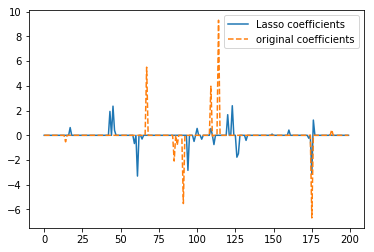

In [6]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# 用于产生稀疏数据
np.random.seed(int(time.time()))
# 生成系数数据，样本为50个，参数为200维
n_samples, n_features = 50, 200
# 基于高斯函数生成数据
X = np.random.randn(n_samples, n_features)
# 每个变量对应的系数
coef = 3 * np.random.randn(n_features)
# 变量的下标
inds = np.arange(n_features)
# 变量下标随机排列
np.random.shuffle(inds)
# 仅仅保留10个变量的系数，其他系数全部设置为0
# 生成稀疏参数
coef[inds[10:]] = 0
# 得到目标值，y
y = np.dot(X, coef)
# 为y添加噪声
y += 0.01 * np.random.normal((n_samples,))

# 将数据分为训练集和测试集
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# Lasso 回归的参数
alpha = 0.1
lasso = Lasso(max_iter=10000, alpha=alpha)

# 基于训练数据，得到的模型的测试结果
# 这里使用的是坐标轴下降算法（coordinate descent）
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)

# 这里是R2可决系数（coefficient of determination）
# 回归平方和（RSS）在总变差（TSS）中所占的比重称为可决系数
# 可决系数可以作为综合度量回归模型对样本观测值拟合优度的度量指标。
# 可决系数越大，说明在总变差中由模型作出了解释的部分占的比重越大，模型拟合优度越好。
# 反之可决系数小，说明模型对样本观测值的拟合程度越差。
# R2可决系数最好的效果是1。
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("测试集上的R2可决系数 : %f" % r2_score_lasso)

plt.plot(lasso.coef_, label='Lasso coefficients')
plt.plot(coef, '--', label='original coefficients')
plt.legend(loc='best')

plt.show()